#  Heart_Disease_Prediction

<br>Md. Tawhidul Islam Bhuiyan
<br>Bsc 4th year, Rajshahi University of Engineering & Technology.

Dataset Source: https://archive.ics.uci.edu/ml/datasets/heart+disease

1. Load the dataset
2. Explain the features and target variable
3. Deal with the missing values
4. Perform One-hot Encoding
5. Split the dataset into 80% training and 20% for testing. Add random state and stratification
6. Perform the training with Decision Tree Classifier
7. Show a tree diagram of the Decision Tree
8. Show the Confusion Matrix, Classification report, and ROC-AUC
9. Explain your outcome.

# import required libraries and packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')





# import the data

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

display(df.head(5))
#print the first 5 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


we can see that there is no columns names which is quite difficult to format or preprocessed the data. we can change the number into names from uci data set describetion

# Attribute Information:



Only 14 attributes used:
1.  (age)
2.  (sex)
3.  (cp) = chest pain
4.  (trestbps) = resting blood pressure in mm Hg
5.  (chol) = serum cholesterol in mg/dl
6.  (fbs) = fasting blood sugar
7.  (restecg) = resting electrocardographic result
8.  (thalach) = maximum heart rate achieved
9.  (exang) = excercise induce angina
10. (oldpeak) = ST depression induced by excercise relative to rest
11. (slope) = the slope of the peak excercise ST segment
12. (ca) = number of major vessels (0-3) colored by fluoroscopy
13. (thal) = this is the  short thalium heart scan


**Target variable:**

hd(the predicted attribute) = diagnosis of heart disease the predicted atrribute

In [5]:
# changing the columns numbers into names
df.columns = ['age','sex','chest pain','resting blood pressure','serum cholesterol','fasting blood sugar','resting electrocardographic result','maximum heart rate','excercise induce angina','oldpeak','slope','number of major vessels','thal','hd']
df.head()

,age,sex,chest pain,resting blood pressure,serum cholesterol,fasting blood sugar,resting electrocardographic result,maximum heart rate,excercise induce angina,oldpeak,slope,number of major vessels,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Identifying missing data

In [6]:
df.dtypes

age                                   float64
sex                                   float64
chest pain                            float64
resting blood pressure                float64
serum cholesterol                     float64
fasting blood sugar                   float64
resting electrocardographic result    float64
maximum heart rate                    float64
excercise induce angina               float64
oldpeak                               float64
slope                                 float64
number of major vessels                object
thal                                   object
hd                                      int64
dtype: object

In [7]:
display(df.info())

# checking for missing value and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 303 non-null    float64
 1   sex                                 303 non-null    float64
 2   chest pain                          303 non-null    float64
 3   resting blood pressure              303 non-null    float64
 4   serum cholesterol                   303 non-null    float64
 5   fasting blood sugar                 303 non-null    float64
 6   resting electrocardographic result  303 non-null    float64
 7   maximum heart rate                  303 non-null    float64
 8   excercise induce angina             303 non-null    float64
 9   oldpeak                             303 non-null    float64
 10  slope                               303 non-null    float64
 11  number of major vessels             303 non-n

None

In [8]:
df['number of major vessels'].unique()
#print out unique value in the column number of major vessels

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

we can see that, there is an missing data. the number represent the number of vessels and question mark represent the missing data

In [9]:
df['thal'].unique()
# #print out unique value in the column that sort form of  thalium heart scan

array(['6.0', '3.0', '7.0', '?'], dtype=object)

we can see that, there is an missing data. the number represent the different diagnoses from the thalium heart scan and question mark represent the missing values

# Dealing with missing data

we can deal with these missing data by deleting these patients from training data set or inpute values for missing dataset

In [10]:
#print the number of rows that contain missing values
len(df.loc[(df['number of major vessels'] == '?')
           |
          (df['thal'] == '?')])

6

only  rows have missing values

In [11]:
df.loc[(df['number of major vessels'] == '?')
           |
          (df['thal'] == '?')]

,age,sex,chest pain,resting blood pressure,serum cholesterol,fasting blood sugar,resting electrocardographic result,maximum heart rate,excercise induce angina,oldpeak,slope,number of major vessels,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(df) # is for counting number of rows in the full dataset

303

so there is total 303 rows ,we can delete this row that contain missing values from the full dataset

In [13]:
df_no_missing = df.loc[(df['number of major vessels'] != '?')
           &
          (df['thal'] != '?')]

#deleting the rows that have question mark

In [14]:
len(df_no_missing)

297

In [15]:
df_no_missing['number of major vessels'].unique()
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

now that two columns do not contain any missing values

# One hot encoding 

In [16]:
X = df_no_missing.drop('hd', axis=1)
y = df_no_missing[['hd']]
#X = train data which we will use to make classification and y = predict heart disease
print(X.shape, y.shape)

(297, 13) (297, 1)


In [17]:
X.dtypes


age                                   float64
sex                                   float64
chest pain                            float64
resting blood pressure                float64
serum cholesterol                     float64
fasting blood sugar                   float64
resting electrocardographic result    float64
maximum heart rate                    float64
excercise induce angina               float64
oldpeak                               float64
slope                                 float64
number of major vessels                object
thal                                   object
dtype: object

**there are 3 category (sex, fasting blood sugar, exercise induced angina containg  only 0's and 1s, no need to format them.
we will apply one-hot encoding to multiple categories features (cp(chest pain), resting electrocardographic result, slope, thal)**

In [18]:
pd.get_dummies(X, columns = ['chest pain']).head()

,age,sex,resting blood pressure,serum cholesterol,fasting blood sugar,resting electrocardographic result,maximum heart rate,excercise induce angina,oldpeak,slope,number of major vessels,thal,chest pain_1.0,chest pain_2.0,chest pain_3.0,chest pain_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [19]:
X_encoded = pd.get_dummies(X, columns = ['chest pain',
                                        'resting electrocardographic result',
                                        'slope',
                                        'thal'])
X_encoded.head()

,age,sex,resting blood pressure,serum cholesterol,fasting blood sugar,maximum heart rate,excercise induce angina,oldpeak,number of major vessels,chest pain_1.0,...,chest pain_4.0,resting electrocardographic result_0.0,resting electrocardographic result_1.0,resting electrocardographic result_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


# Format target feature

In [20]:
y.hd.unique()

array([0, 2, 1, 3, 4], dtype=int64)

y doesn't just contain 0s and 1s . Instead, it has 5 different levels of heart diseases, 0 = no heart disease and 1-4 are various degrees of heart diseases,we can see that from y unique values.

**But if we want to show someone has heart disease or not, so we need to convert all numbers > 0 to 1**

In [21]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 #set each non-zero value in y to 1
y.hd.unique()  # verify that y only contains 0 and 1

array([0, 1], dtype=int64)

# split the train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 22) (90, 22) (207, 1) (90, 1)


# Decision Tree Classifier

In [23]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

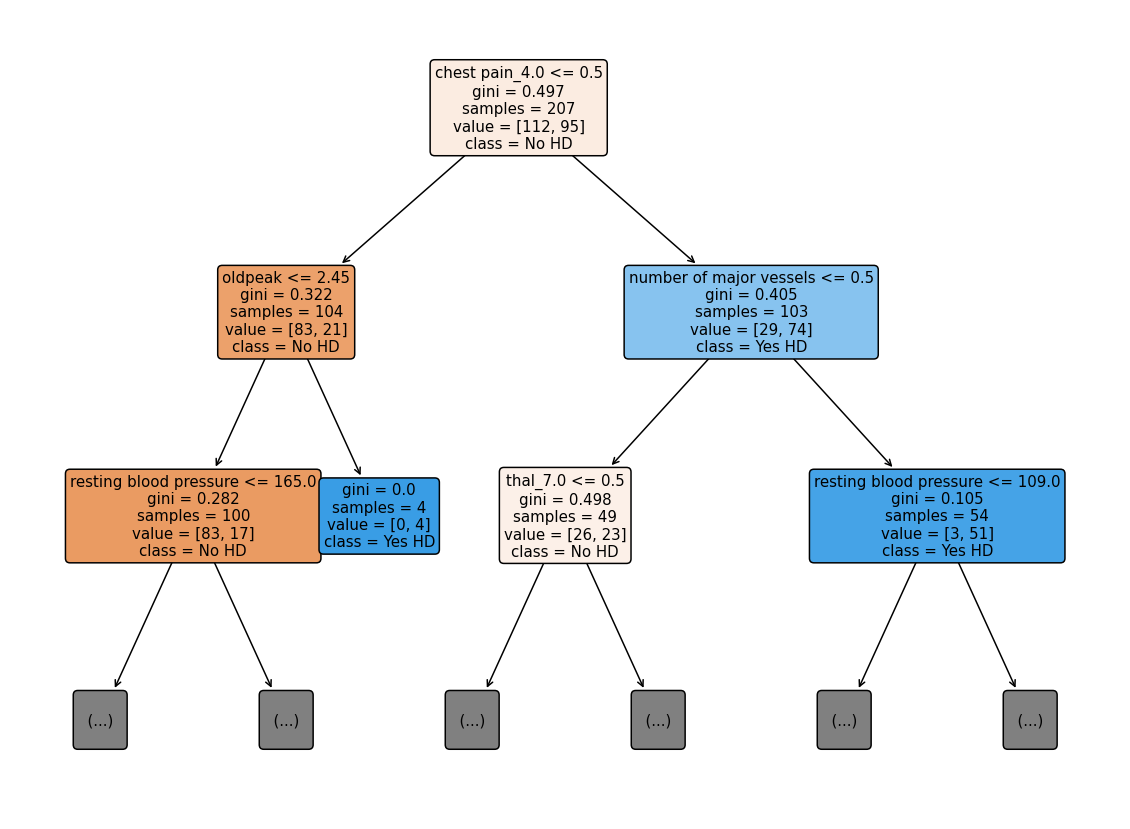

In [29]:
plt.figure(figsize = (20, 15))
plot_tree(model, filled = True,
          rounded = True,
          class_names = ['No HD', 'Yes HD'],
          feature_names = X_encoded.columns, max_depth=2,
         fontsize=15);

# Confusion Matrix

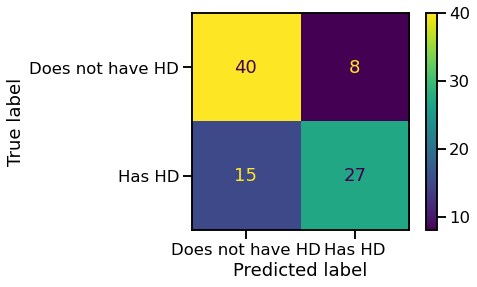

In [25]:
plot_confusion_matrix(model, X_test, y_test['hd'], display_labels = ['Does not have HD','Has HD'])
plt.show()

**In the confusion matrix, 39 + 9 = 48 people that did not have Heart Disease, 39 (81%) were correctly classified. 17 + 25 = 42 people that have Heart Disease, 25 (59.52%) were correctly classified.**

# Prediction

In [26]:
y_pred = model.predict(X_test)

# Classification Report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        48
           1       0.77      0.64      0.70        42

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90



**REPORT:**

1. model accuracy is 71% means that 29 of every 100 labels is incorrect, and 71 is correct for predicting Heart disease.
Precision= Out of all the examples that predicted as positive, how many are really positive? here 74% means that model predicted as positive(has heart disease) (26 + 8 =34), but really positive (has heart disease) only 26 people.

2. Recall/sensitivity = Out of all the positive examples, how many are predicted as positive? Here 60% means that all positive are (16 +26 = 42), but model predicted as positive only 26

3. F1-score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

4. support: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.


# ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

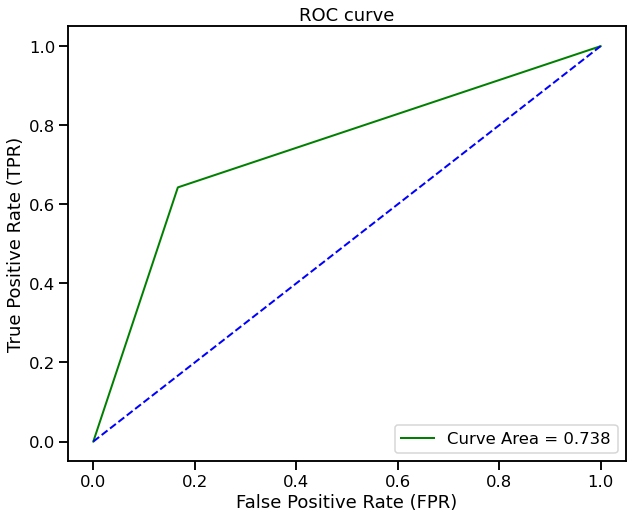

In [28]:
fpr, tpr, thr = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Here model AUC value is 0.7 that means the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.